In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [20]:
movie_df.columns

Index(['Unnamed: 0', 'title', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'poster_path', 'percent_return', 'profit',
       'genre_1', 'genre_2', 'year', 'month', 'day', 'is_english'],
      dtype='object')

,title,original_language,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,percent_return,year,month,day,is_english
0,Black Panther: Wakanda Forever,en,3952.862,Marvel Studios,2022-11-09,250000000.0,855099029.0,162.0,7.403,3586.0,3.420396,2022,11,Wed,1
1,Puss in Boots: The Last Wish,en,3351.139,Other,2022-12-07,90000000.0,442000000.0,103.0,8.461,4047.0,4.911111,2022,12,Wed,1
2,Plane,en,3337.265,Other,2023-01-12,25000000.0,46000000.0,107.0,6.851,652.0,1.840000,2023,1,Thu,1
3,M3GAN,en,1836.162,Other,2022-12-28,12000000.0,167643991.0,102.0,7.510,1794.0,13.970333,2022,12,Wed,1
4,Knock at the Cabin,en,1677.354,Other,2023-02-01,20000000.0,52000000.0,100.0,6.525,546.0,2.600000,2023,2,Wed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9463,Requiem,en,0.600,Other,2018-11-24,500.0,500.0,10.0,0.000,0.0,1.000000,2018,11,Sat,1
9464,Rejects,en,0.600,Other,2021-07-30,500.0,500.0,13.0,8.000,1.0,1.000000,2021,7,Fri,1
9465,A Brave New World,ko,0.600,Other,2012-04-05,1600000.0,636990.0,41.0,0.000,0.0,0.398119,2012,4,Thu,0
9466,Gal Dil Di,pa,0.600,Other,2020-11-03,500.0,700.0,4.0,0.000,0.0,1.400000,2020,11,Tue,0


In [99]:
movie_df = pd.read_csv('cleaned_movie.csv')
movie_df.head()

,Unnamed: 0,title,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,poster_path,percent_return,profit,genre_1,genre_2,year,month,day
0,0,Black Panther: Wakanda Forever,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,3952.862,Marvel Studios,2022-11-09,250000000.0,855099029.0,162.0,7.403,3586.0,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.420396,605099029.0,Action,Adventure,2022,11,09 00:00:00
1,1,Puss in Boots: The Last Wish,en,Puss in Boots discovers that his passion for a...,3351.139,Other,2022-12-07,90000000.0,442000000.0,103.0,8.461,4047.0,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,4.911111,352000000.0,Animation,Adventure,2022,12,07 00:00:00
2,2,Plane,en,After a heroic job of successfully landing his...,3337.265,Other,2023-01-12,25000000.0,46000000.0,107.0,6.851,652.0,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,1.840000,21000000.0,Action,Adventure,2023,1,12 00:00:00
3,4,M3GAN,en,A brilliant toy company roboticist uses artifi...,1836.162,Other,2022-12-28,12000000.0,167643991.0,102.0,7.510,1794.0,/d9nBoowhjiiYc4FBNtQkPY7c11H.jpg,13.970333,155643991.0,Science Fiction,Horror,2022,12,28 00:00:00
4,5,Knock at the Cabin,en,While vacationing at a remote cabin a young gi...,1677.354,Other,2023-02-01,20000000.0,52000000.0,100.0,6.525,546.0,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,2.600000,32000000.0,Horror,Mystery,2023,2,01 00:00:00


FEATURE ENGINEERING

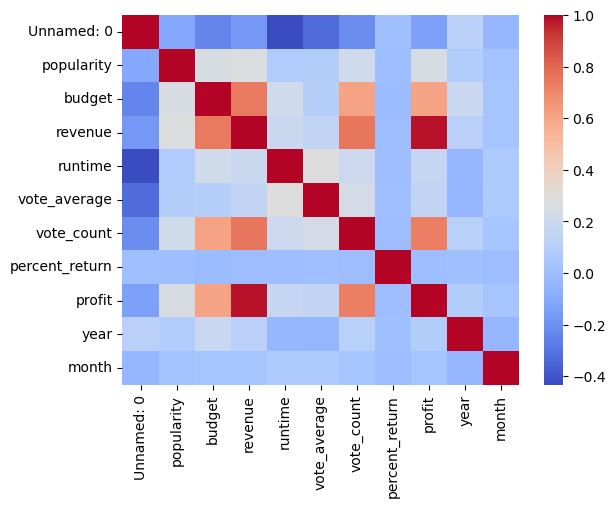

In [3]:
# Create a correlation matrix
corr_matrix = movie_df.corr()


# Display the matrix
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

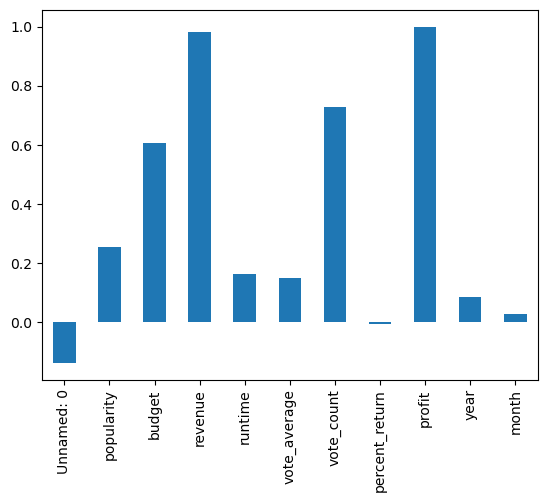

In [4]:
# Display a plot of Target correlations
corr_matrix['profit'].plot(kind='bar')
plt.show()

In [100]:
import datetime
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan
    
movie_df['day'] = movie_df['release_date'].apply(get_day)
movie_df.head()

,Unnamed: 0,title,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,poster_path,percent_return,profit,genre_1,genre_2,year,month,day
0,0,Black Panther: Wakanda Forever,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,3952.862,Marvel Studios,2022-11-09,250000000.0,855099029.0,162.0,7.403,3586.0,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.420396,605099029.0,Action,Adventure,2022,11,Wed
1,1,Puss in Boots: The Last Wish,en,Puss in Boots discovers that his passion for a...,3351.139,Other,2022-12-07,90000000.0,442000000.0,103.0,8.461,4047.0,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,4.911111,352000000.0,Animation,Adventure,2022,12,Wed
2,2,Plane,en,After a heroic job of successfully landing his...,3337.265,Other,2023-01-12,25000000.0,46000000.0,107.0,6.851,652.0,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,1.840000,21000000.0,Action,Adventure,2023,1,Thu
3,4,M3GAN,en,A brilliant toy company roboticist uses artifi...,1836.162,Other,2022-12-28,12000000.0,167643991.0,102.0,7.510,1794.0,/d9nBoowhjiiYc4FBNtQkPY7c11H.jpg,13.970333,155643991.0,Science Fiction,Horror,2022,12,Wed
4,5,Knock at the Cabin,en,While vacationing at a remote cabin a young gi...,1677.354,Other,2023-02-01,20000000.0,52000000.0,100.0,6.525,546.0,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,2.600000,32000000.0,Horror,Mystery,2023,2,Wed


In [101]:
movie_df = movie_df.drop(columns=['Unnamed: 0','overview','poster_path','genre_1','genre_2','profit','release_date','production_companies'])

In [102]:
def feature_engineering(new_df):
    new_df['is_english'] = new_df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    new_df = new_df.drop('original_language', axis=1)
    new_df['is_Friday'] = new_df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    new_df = new_df.drop('day', axis=1)
    new_df['is_Holiday'] = new_df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    new_df = new_df.drop('month', axis=1)
    new_df = new_df.drop(['title'], axis=1)
    new_df = pd.get_dummies(new_df, prefix='is')
    new_df['runtime'] = new_df['runtime'].fillna(new_df['runtime'].mean())
    new_df['vote_average'] = new_df['vote_average'].fillna(new_df['vote_average'].mean())

    return new_df


In [103]:
new_movie_df = feature_engineering(movie_df)
new_movie_df

,popularity,budget,revenue,runtime,vote_average,vote_count,percent_return,year,is_english,is_Friday,is_Holiday
0,3952.862,250000000.0,855099029.0,162.0,7.403,3586.0,3.420396,2022,1,0,0
1,3351.139,90000000.0,442000000.0,103.0,8.461,4047.0,4.911111,2022,1,0,0
2,3337.265,25000000.0,46000000.0,107.0,6.851,652.0,1.840000,2023,1,0,0
3,1836.162,12000000.0,167643991.0,102.0,7.510,1794.0,13.970333,2022,1,0,0
4,1677.354,20000000.0,52000000.0,100.0,6.525,546.0,2.600000,2023,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9463,0.600,500.0,500.0,10.0,0.000,0.0,1.000000,2018,1,0,0
9464,0.600,500.0,500.0,13.0,8.000,1.0,1.000000,2021,1,1,0
9465,0.600,1600000.0,636990.0,41.0,0.000,0.0,0.398119,2012,0,0,0
9466,0.600,500.0,700.0,4.0,0.000,0.0,1.400000,2020,0,0,0


new_movie_df.columns


In [104]:
# Define the X (features) and y (target) sets
y = new_movie_df["revenue"].values
X = new_movie_df.drop("revenue", axis=1)

In [105]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Linear Regression Model for Movies_df

In [106]:
# what is the difference between classifier and model?....

# Train a Logistic Regression model and print the model score

# Creating the logistical regression model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier

# fit model using training data
classifier.fit(X_train, y_train)
training_score = classifier.score(X_train, y_train)
testing_score = classifier.score(X_test, y_test)

# print training and test scores
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7149130456986493
Testing Score: 0.6955101712950706


Lasso Regression for Feature Selection

In [107]:
# lasso regression for feature selection
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_scaled, y_train)
coefficients = model_lasso.coef_
importance = np.abs(coefficients)
features = X_train.columns
np.array(features)[importance > 0]
# np.array(features)[importance == 0]

array(['popularity', 'budget', 'runtime', 'vote_average', 'vote_count',
       'percent_return', 'year', 'is_english', 'is_Friday'], dtype=object)

Random Forest Model for Movies_df

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
from sklearn.metrics import r2_score

clf = RandomForestRegressor(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)


pred_ran_for = clf.predict(X_train)

print((mean_absolute_error(y_train,pred_ran_for)))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

C:\Users\alexc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


2392779654.1056275
Training Score: 0.9940723357575031
Testing Score: 0.9557179464399436


Lasso Regression
Support Vector Regression
Ridge Regression

In [86]:
Adj_r2 = 1 - (1-r2_score(y_train, pred_ran_for )) * (len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)
Adj_r2


-241.04482688878966

In [80]:
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print((mean_absolute_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))



39266988.142988995
0.7248060628283023
87465951.82301407
0.6907562881590954


In [74]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)

ridge.fit(X_train_scaled, y_train)

# Print coefficients and intercept
# print('Coefficients:', ridge.coef_)
# print('Intercept:', ridge.intercept_)

# Predict on test set and calculate R^2 score
y_pred = ridge.predict(X_test_scaled)

# summarize prediction
print('Test Score:',% y_pred)

r_squared = ridge.score(X_test_scaled, y_test)
print('Training Score', r_squared)



SyntaxError: invalid syntax (520317289.py, line 14)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the data
X, y = load_data() # Replace with actual code to load data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVR model
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predict on test set and calculate R^2 score
y_pred = svr.predict(X_test_scaled)
r_squared = svr.score(X_test_scaled, y_test)
print('R^2 Score:', r_squared)


In [ ]:
profit will be our Y in the train test model
what supervised models do we want to use and what encoding do we want to use
will have to change preprocessing for each model (ie one hot or label encoding)

In [ ]:
one hot encoding for changing genre
feature engineering - is title a series or no?
label encoding vs one encoding - which one to use to be based on model we use